# Linear Regression
Implementing Linear Regression for predicting profit of a food truck given the population and profits of different cities


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


### Reading the dataset

In [ ]:

filename = 'Data1.txt'
data = pd.read_csv(filename,header=None,names=["Population","Profit"])
data.insert(0,"ones",1)
print(data)
#load dataset

    ones  Population    Profit
0      1      6.1101  17.59200
1      1      5.5277   9.13020
2      1      8.5186  13.66200
3      1      7.0032  11.85400
4      1      5.8598   6.82330
..   ...         ...       ...
92     1      5.8707   7.20290
93     1      5.3054   1.98690
94     1      8.2934   0.14454
95     1     13.3940   9.05510
96     1      5.4369   0.61705

[97 rows x 3 columns]


In [ ]:
data.info()#describe the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ones        97 non-null     int64  
 1   Population  97 non-null     float64
 2   Profit      97 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [ ]:
data.describe()

,ones,Population,Profit
count,97.0,97.000000,97.000000
mean,1.0,8.159800,5.839135
std,0.0,3.869884,5.510262
min,1.0,5.026900,-2.680700
25%,1.0,5.707700,1.986900
50%,1.0,6.589400,4.562300
75%,1.0,8.578100,7.046700
max,1.0,22.203000,24.147000


### Scatter plot of Population vs Profit

In [ ]:
#plot

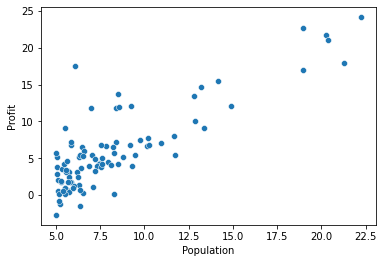

In [ ]:
import seaborn as sns
sns.scatterplot(data=data, x="Population", y="Profit")

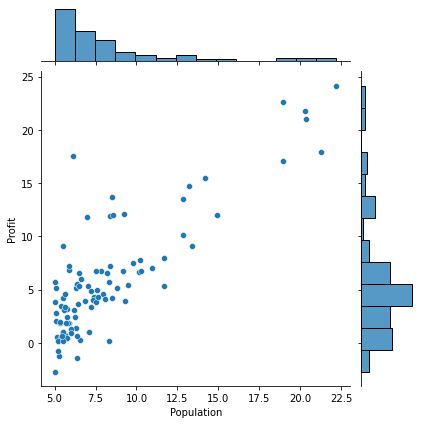

In [ ]:
sns.jointplot(x='Population', y='Profit', data = data)

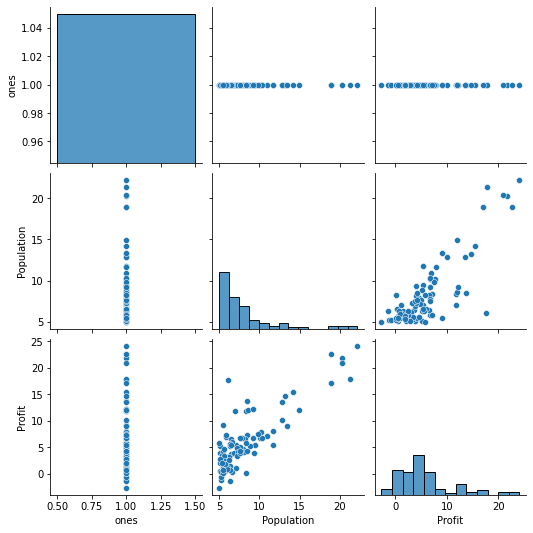

In [ ]:
sns.pairplot(data)

### Function to compute the cost function 

In [ ]:
### Function to compute the cost function 

In [ ]:
def computeCost(X, y, theta):
    inner_product = np.power(((X * theta.T) - y) , 2)
    return np.sum(inner_product) / (2 * len(X))

### Set training data (X) and target variable (y)

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

### Converting dataframe to numpy matrices and creating a parameter (theta) matrix

In [ ]:
X=np.matrix(np.array(X))
y=np.matrix(y)
X
y
#converting X,y into numpy matrix

matrix([[17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
          4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
          3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
          3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
          3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
         -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
          4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
          5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
          8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
          1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
          5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
          5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
          1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
          6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
          5.3436 ,  4.2415 ,  6.79

In [ ]:
#converting theta into numpy matrix
# take initial values as [0,0] for theta
theta = np.matrix(np.array([0,0]))


### Function to perform gradient descent on parameters theta by repeatedly updating the parameters

In [ ]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        
        error = (X *theta.T)-y
        
        for j in range (parameters):
        
        
            term = np.multiply(error , X[: , j])
            temp[0,j] = theta[0,j] - ((alpha /len(x)) *np.sum(term))
        
        theta = temp
        cost[i] = computeCost(X,y,theta)
    
    
    # With each iteration, we are calculating the changes to be made to the
    # parameter (theta) value to reduce the error (cost)

        # number of parameters to be calculated,here we have 2 parameters theta [0,0] and theta [0,1]
        
        
    return theta, cost


### Set values for learning rate and number of iterations
- alpha here denotes the learning rate that helps to determine how quickly the algorithm
    will converge to the optimal solution
- iters denotes the number of iterations

In [ ]:
# take alpha 0.01 
# iters=1000
alpha=0.01
iters=1000

In [ ]:
theta, cost = gradientDescent(X,y,theta,alpha,iters)

NameError: ignored




### Using Matplotlib library to visualize our solution using scatter plot

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

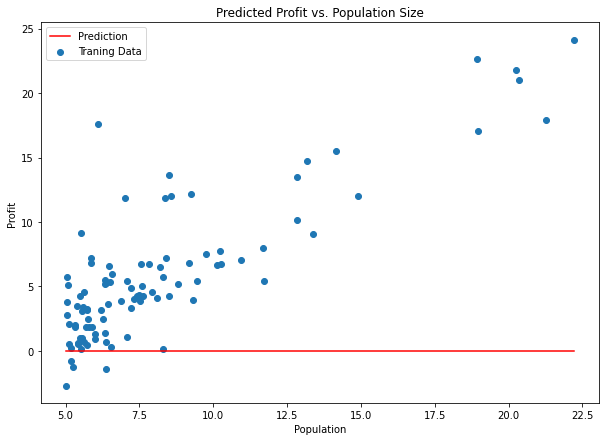

In [ ]:
# linspace function will create an evenly-spaced series of points within the range of our data
x = np.linspace(data.Population.min(), data.Population.max(), 100)  
f = theta[0, 0] + (theta[0, 1] * x )

fig, ax = plt.subplots(figsize=(10, 7))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')


NameError: ignored

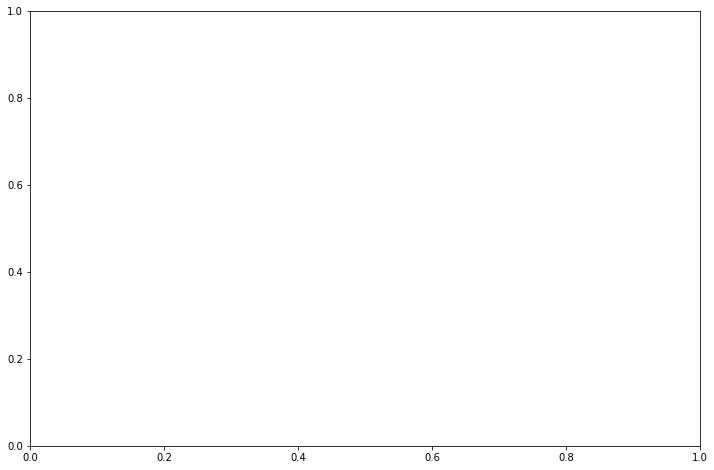

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training epoch')

SCIKIT LEARN IMPLEMENTATION

-Implement various type of errors,
 eg.Mean squared error,R_squared_score
choose best for the evaluting model,
and justify why it is best


In [ ]:
#fit the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predict the target values
y_pred = regressor.predict(X_test)

VISUALISING TEST RESULT

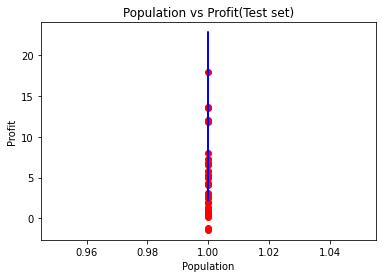

In [ ]:
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_train[:,0], regressor.predict(X_train), color = 'blue')
plt.title('Population vs Profit(Test set)')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

In [ ]:
#evalute the model
import math
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
MSE=mean_squared_error(y_test, y_pred)
RMSE= math.sqrt(MSE)
MAE=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

In [ ]:
MSE


8.52459344464155

In [ ]:
RMSE

2.9196906419416337

In [ ]:
MAE

2.2656743513846744

In [ ]:
r2

0.5856308942920143

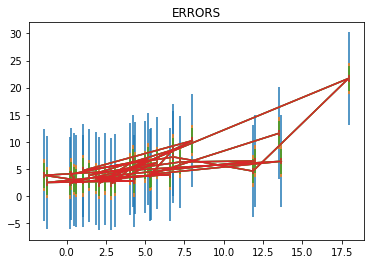

In [ ]:
plt.errorbar(y_test, y_pred,yerr = MSE)
plt.errorbar(y_test, y_pred,yerr = RMSE)
plt.errorbar(y_test, y_pred,yerr = MAE)
plt.errorbar(y_test, y_pred,yerr = r2)

  
plt.title('ERRORS')
plt.show()